<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [49]:
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Для воспроизводимости`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [50]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')
df_test.to_csv("test.csv")
print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [x] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [x] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [x] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [x] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [51]:
df_train.sample(n=10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

In [52]:
df_test.head(5)

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [53]:
df_test.tail(5)

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [54]:
df_train.columns[df_train.isnull().any()].tolist()

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [55]:
df_train.duplicated().any()

True

In [56]:
from ydata_profiling import ProfileReport

ProfileReport(df_train, title="Profiling Report").to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [57]:
# your code here
def fill_with_median(df_train, df):
    for column in df.select_dtypes(np.number).columns:
        df.fillna({column: df_train[column].median()}, inplace=True)


fill_with_median(df_train, df_train)
fill_with_median(df_train, df_test)

df_train.columns[df_train.isnull().any()].tolist()
df_train.sample(50)

name  year  selling_price  \
6973                        Tata Nexon 1.5 Revotorq XT  2018         800000   
2638                                Maruti Wagon R VXI  2006         135000   
4256                            Maruti Swift Dzire VDI  2019         675000   
5699                            Maruti Swift Dzire ZDI  2018         780000   
2629                       Maruti Omni E MPI STD BS IV  2016         190000   
5512                                Tata Indica V2 LSi  2008          85000   
4885                                Tata Nano Twist XE  2015         110000   
1964                         Maruti Omni 8 Seater BSII  2010         130000   
2343         Ford EcoSport 1.5 Ti VCT AT Titanium BSIV  2015         775000   
5179                               Mahindra TUV 300 T8  2017         700000   
169                                Honda City 1.5 S MT  2009         345000   
933             Toyota Innova 2.5 VX (Diesel) 7 Seater  2013         750000   
3085  Renault Duster 85PS Diesel RxL Optional with Nav  2013         425000   
436                             Maruti Swift Dzire VXi  2008         160000   
2760            Toyota Innova 2.5 GX (Diesel) 8 Seater  2016        1151000   
1455                         Hyundai i20 Active 1.4 SX  2015         600000   
807                                     Maruti SX4 ZDI  2011         250000   
5184                                  BMW X3 xDrive20d  2012        1800000   
4559           Hyundai Grand i10 1.2 Kappa Sportz BSIV  2019         562000   
5189                                   Maruti Alto LXi  2009         125000   
1858                         Hyundai Xcent 1.1 CRDi SX  2016         550000   
6051       Ford EcoSport 1.5 Diesel Titanium Plus BSIV  2018         950000   
5277                                   Honda Brio S MT  2013         300000   
3983                        Ford Endeavour 2.5L 4X2 MT  2010         500000   
4807                           Toyota Camry 2.5 Hybrid  2016        2000000   
2118                          Chevrolet Beat Diesel LT  2012         175000   
4731                          Maruti Omni MPI STD BSIV  2015         180000   
6573                         Hyundai Verna 1.6 CRDi SX  2016         803999   
5444                               Chevrolet Cruze LTZ  2011         270000   
3311                            Maruti Swift Dzire VDi  2010         225000   
1475                              Maruti Swift AMT ZXI  2018         600000   
2369                            Hyundai i10 Magna 1.1L  2017         385000   
5737           Hyundai Grand i10 1.2 Kappa Sportz BSIV  2018         610000   
1730                                 Maruti Ertiga VDI  2013         625000   
4128                              Maruti Swift AMT ZXI  2018         600000   
4029                     Mahindra Bolero 2011-2019 SLE  2015         375000   
1120                                  Renault KWID RXT  2016         315000   
3716                            Maruti Swift Dzire LDI  2018         650000   
824                       Maruti Eeco 5 Seater AC BSIV  2011         150000   
4289                                    Maruti Zen LXI  2004          70000   
4285                                    Maruti Zen LXI  2002          55000   
2505                                  Maruti Swift VDI  2013         500000   
6653                        Honda CR-V 2.4L 4WD AT AVN  2017        1650000   
5164                                  Maruti Swift LXI  2011         277000   
5425                      Ford Fiesta EXi 1.4 TDCi Ltd  2011         220000   
1783                       Hyundai i20 Sportz 1.4 CRDi  2014         450000   
4714                                  Maruti Swift VDI  2015         550000   
3927                     Hyundai Grand i10 CRDi Sportz  2016         380000   
4504                             Maruti Ciaz 1.3 Sigma  2018         750000   
5058                    Mahindra Bolero Pik-Up FB 1.7T  2020         679000   

      km_driven    f

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [58]:
df_train.drop(columns=["selling_price"]).duplicated().sum()

1159

In [59]:
df_train[df_train.drop(columns=["selling_price"]).duplicated()]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
...         ...     ...         ...          ...           ...         ...   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
268   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
...       ...         ...                  ...    ...  
6947   995 CC      62 bhp      90.3Nm@ 4200rpm    5.0  
6984  1498 CC   98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 13 columns]

In [60]:
df_train.drop_duplicates(subset=df_train.columns.drop("selling_price"), keep='first', inplace=True)
df_train.reset_index(drop=True, inplace=True)

In [61]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [62]:
df_train["mileage"] = df_train["mileage"].map(lambda x: float(x.split(" ")[0]) if isinstance(x, str) else x)
df_train["engine"] = df_train["engine"].map(lambda x: float(x.split(" ")[0]) if isinstance(x, str) else x)
df_train["max_power"] = df_train["max_power"].map(lambda x: x.split(" ")[0] if isinstance(x, str) else x).map(
    lambda x: None if x == '' else float(x))
df_train.drop("torque", axis=1, inplace=True)
df_test["mileage"] = df_test["mileage"].map(lambda x: float(x.split(" ")[0]) if isinstance(x, str) else x)
df_test["engine"] = df_test["engine"].map(lambda x: float(x.split(" ")[0]) if isinstance(x, str) else x)
df_test["max_power"] = df_test["max_power"].map(lambda x: x.split(" ")[0] if isinstance(x, str) else x).map(
    lambda x: None if x == '' else float(x))
df_test.drop("torque", axis=1, inplace=True)


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [63]:
import math

df_train["engine"] = df_train["engine"].map(lambda x: int(x) if not math.isnan(x) else None)
df_test["engine"] = df_test["engine"].map(lambda x: int(x) if not math.isnan(x) else None)

df_train["seats"] = df_train["seats"].map(lambda x: int(x) if not math.isnan(x) else None)
df_test["seats"] = df_test["seats"].map(lambda x: int(x) if not math.isnan(x) else None)


In [64]:
fill_with_median(df_train, df_train)
fill_with_median(df_train, df_test)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения
.

In [65]:
df_train.describe(include=np.number)

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.906371     5.426712  
std      31.640418     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

In [66]:
df_test.describe(include=np.number)

year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.00000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.33881  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.95175   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.00000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.55000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.37000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.30000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.26000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.841670     5.403000  
std      34.893389     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

In [67]:
df_train.describe(include=np.object_)

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [68]:
df_test.describe(include=np.object_)

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [69]:
# assert df_train.shape == (5840, 13) заменил на 12, так как удалил поле torque
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
  - Можно, у selling price есть явная зависимость с year, km_driven, engine и max_power
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?
  - Можно, заметны корреляции max_power и engine

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?" - Отличия есть, но общая картина похожа

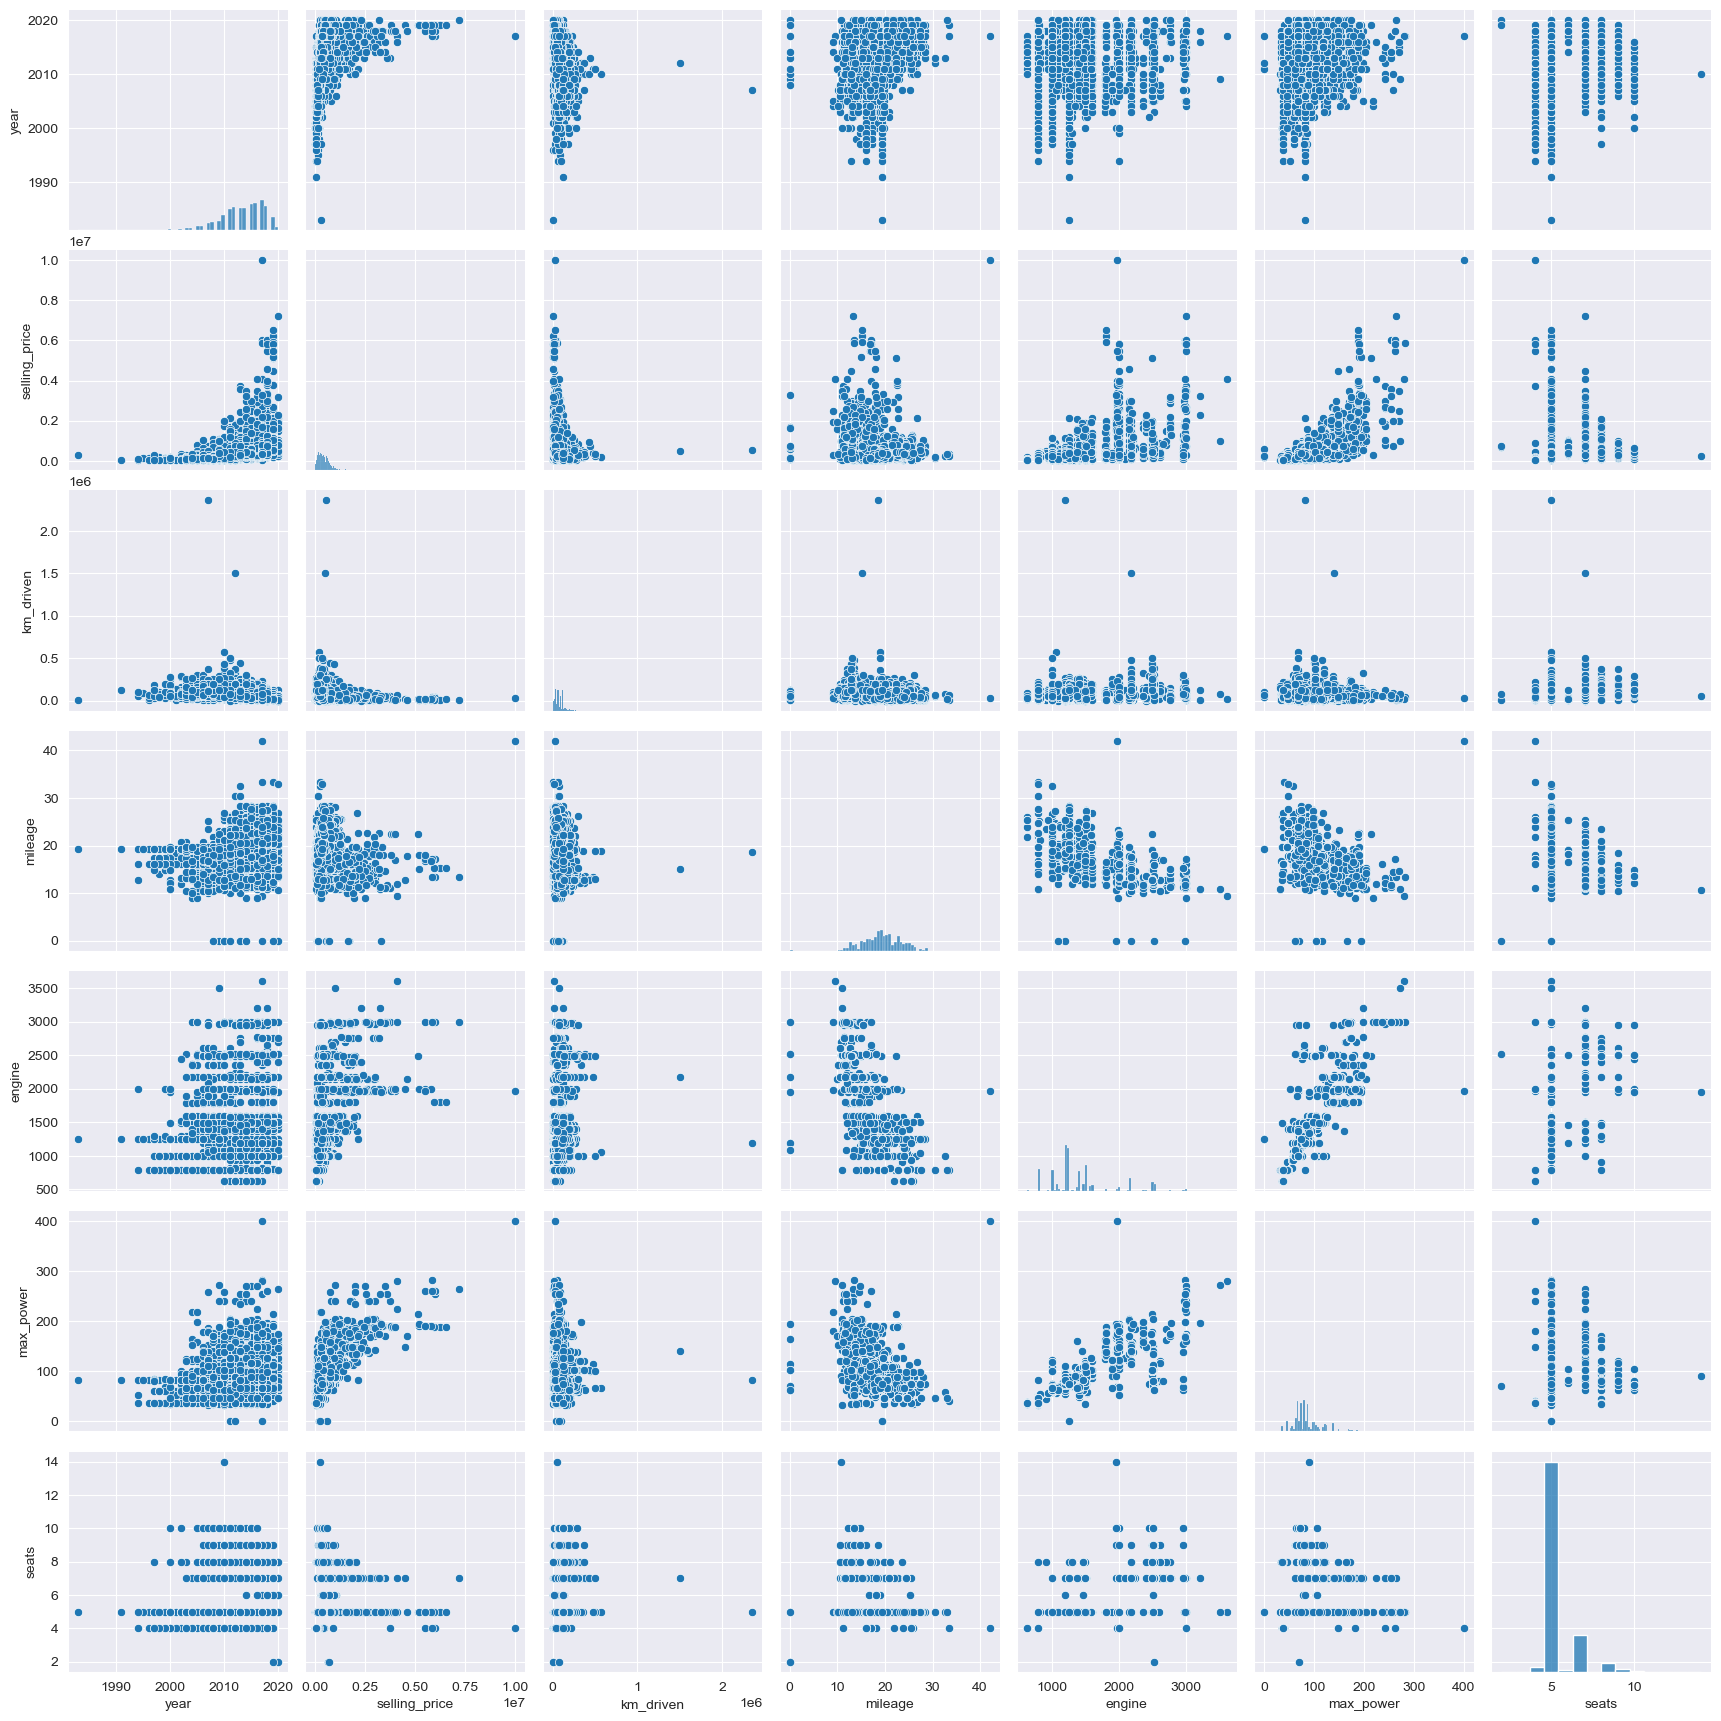

In [70]:
%matplotlib inline

sns.pairplot(df_train[df_train.select_dtypes(np.number).columns])
plt.show()

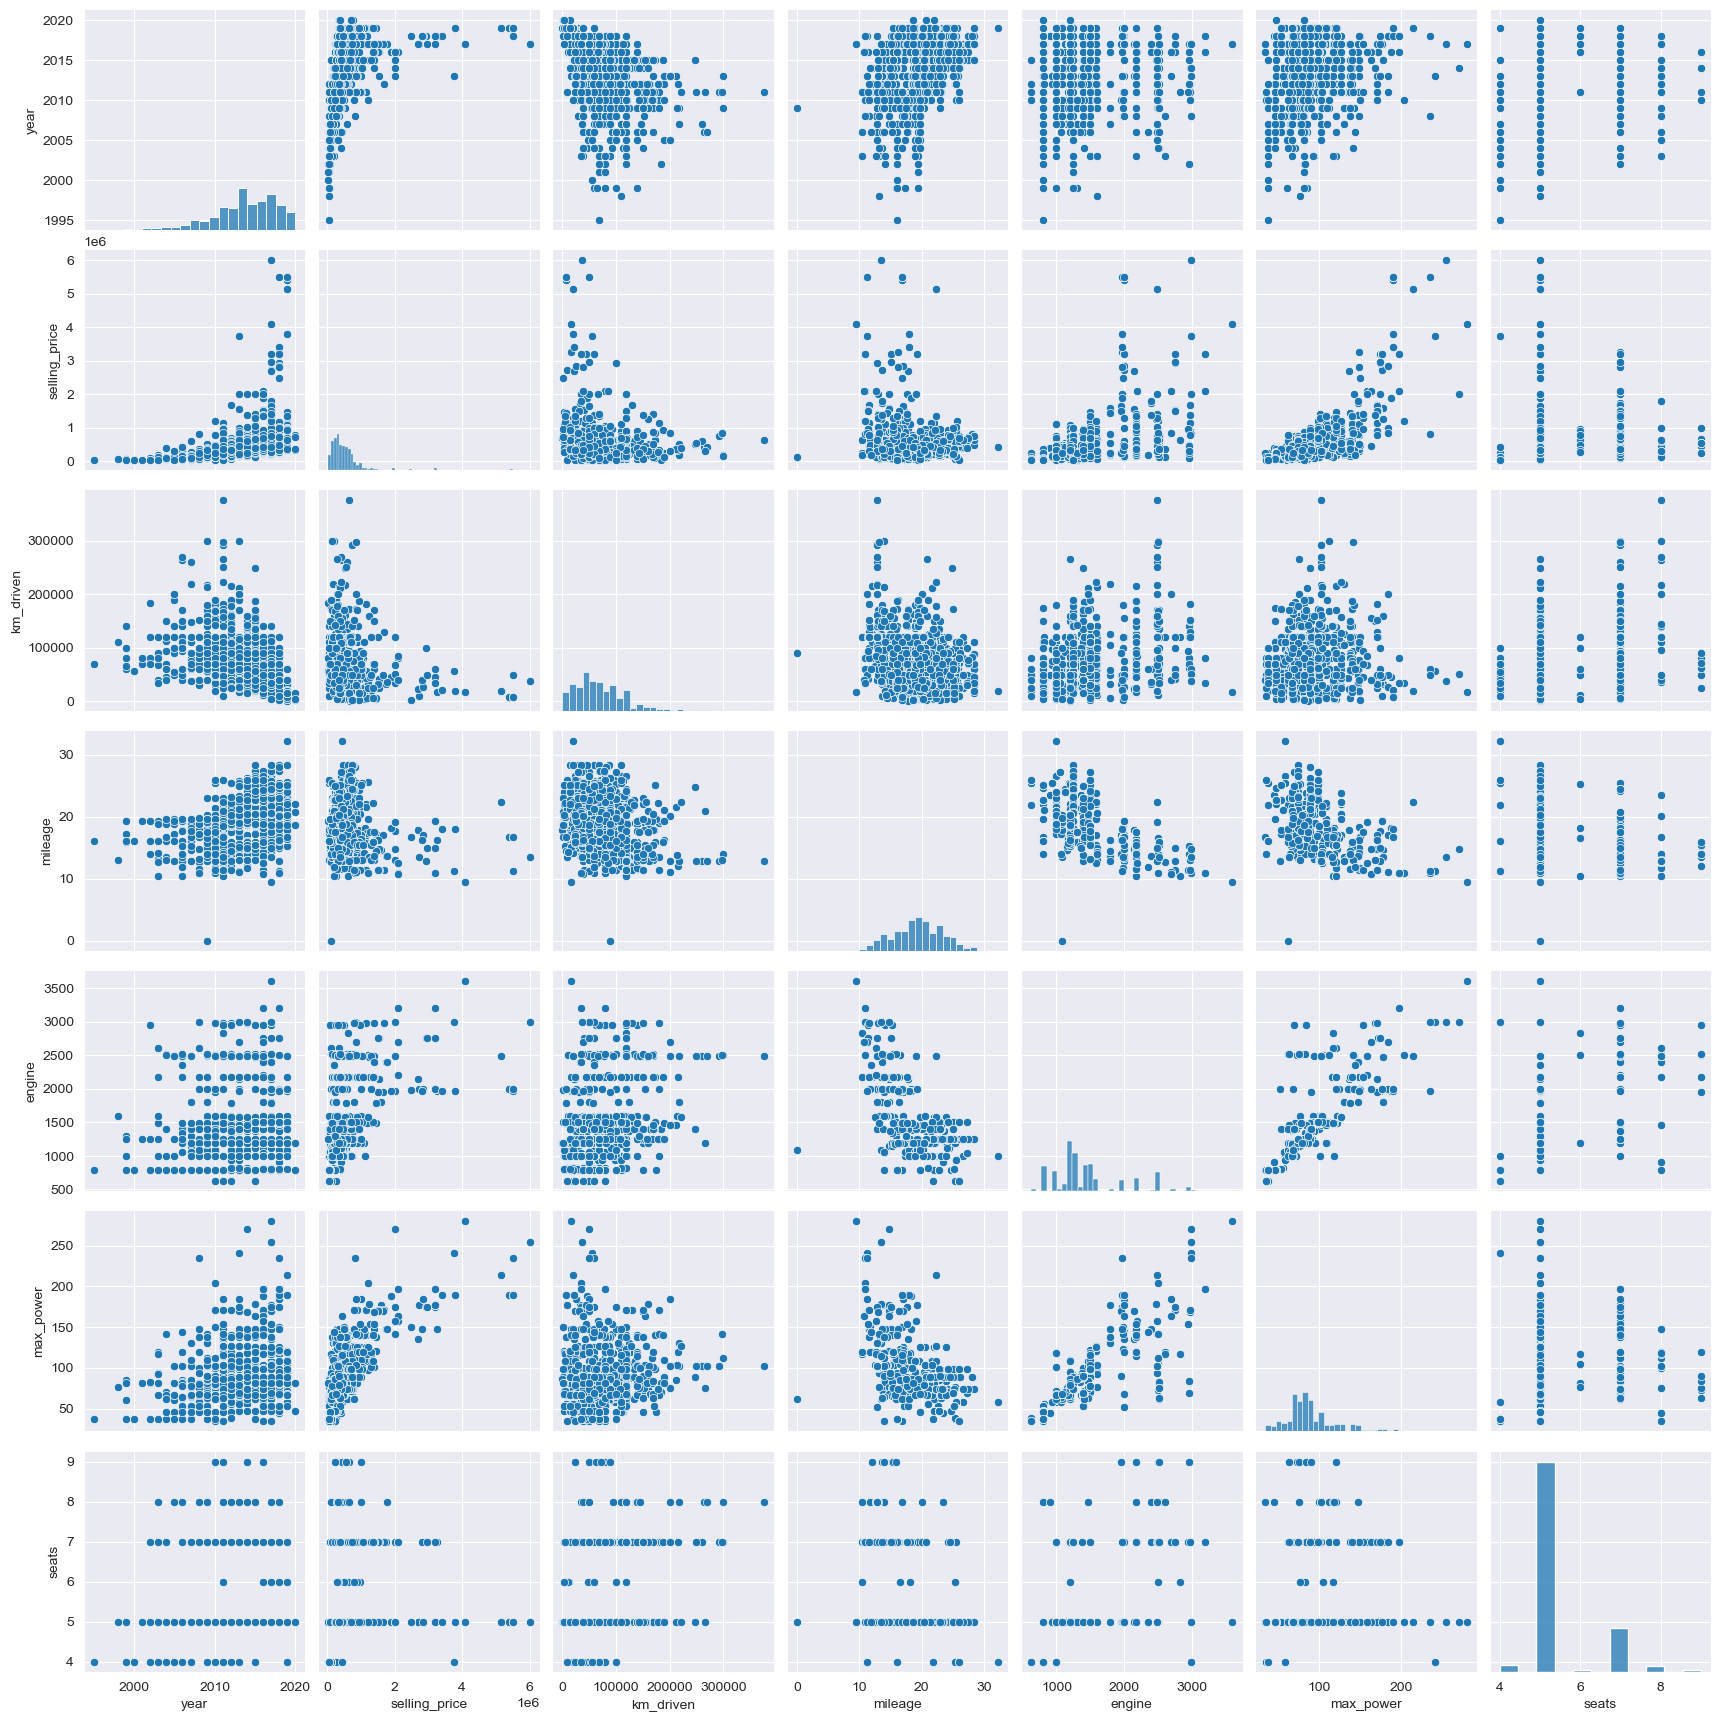

In [71]:
sns.pairplot(df_test[df_test.select_dtypes(np.number).columns])
plt.show()

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [72]:
corr = df_train.select_dtypes(np.number).corr("pearson")
corr

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.341334  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.104769  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.182086  0.229766   
mileage        0.341334      -0.104769  -0.182086  1.000000 -0.572893   
engine         0.002819       0.447672   0.229766 -0.572893  1.000000   
max_power      0.156858       0.692814   0.024588 -0.373390  0.681117   
seats          0.041178       0.149953   0.192328 -0.451059  0.652172   

               max_power     seats  
year            0.156858  0.041178  
selling_price   0.692814  0.149953  
km_driven       0.024588  0.192328  
mileage        -0.373390 -0.451059  
engine          0.681117  0.652172  
max_power       1.000000  0.244112  
seats           0.244112  1.000000

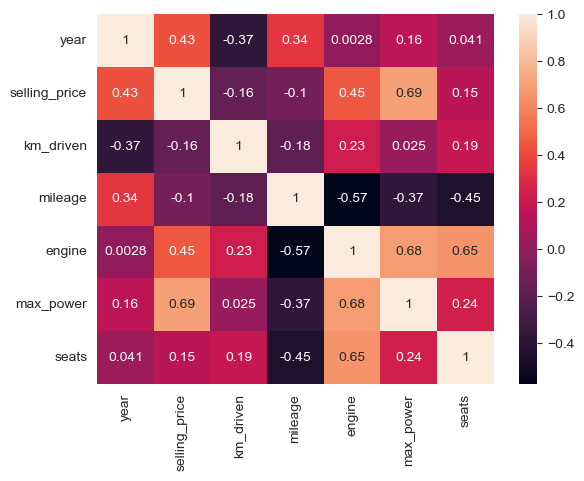

In [73]:
sns.heatmap(corr, annot=True)
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой? - year и engine
 - Между какими наблюдается довольно сильная положительная линейная зависимость? - selling_price и max_power
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи? - да, так как корреляция отрицательная

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [74]:
df_train_num = df_train[df_train.select_dtypes(np.number).columns]
y_train = df_train_num['selling_price']
X_train = df_train_num.drop(columns=['selling_price'])

In [75]:
assert X_train.shape == (5840, 6)

In [76]:
df_test_num = df_test[df_test.select_dtypes(np.number).columns]
y_test = df_test_num['selling_price']
X_test = df_test_num.drop(columns=['selling_price'])

In [77]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE


def print_r_2_and_mse(x_train, y_train, x_test, y_test, algorithm=None):
    lr = LinearRegression() if algorithm is None else algorithm
    lr.fit(x_train, y_train)
    train_prediction = lr.predict(x_train)
    test_prediction = lr.predict(x_test)
    print("R^2 train: {}".format(r2_score(y_train, train_prediction)))
    print("MSE train: {}".format(MSE(y_train, train_prediction)))
    print("R^2 test: {}".format(r2_score(y_test, test_prediction)))
    print("MSE test: {}".format(MSE(y_test, test_prediction)))
    return lr


lr_prediction = print_r_2_and_mse(X_train, y_train, X_test, y_test).predict(X_test)

R^2 train: 0.5922591702157303
MSE train: 116874153930.02895
R^2 test: 0.5941419794788415
MSE test: 233298779730.45566


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns, index=X_test.index)

lr = print_r_2_and_mse(X_train, y_train, X_test, y_test)
scaled_lr_prediction = lr.predict(X_test)

R^2 train: 0.5922591702157305
MSE train: 116874153930.0289
R^2 test: 0.5941419794788518
MSE test: 233298779730.44968


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены
?

In [80]:
pd.DataFrame({'column': X_train.columns, 'coef': lr.coef_}).sort_values(by='coef', key=abs, ascending=False).head(1)

column           coef
4  max_power  322807.353259

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [81]:
from sklearn.linear_model import Lasso

lasso = print_r_2_and_mse(X_train, y_train, X_test, y_test, algorithm=Lasso())

R^2 train: 0.5922591701804456
MSE train: 116874153940.1429
R^2 test: 0.5941408124026636
MSE test: 233299450599.1693


In [82]:
pd.DataFrame({'column': X_train.columns, 'coef': lasso.coef_}).sort_values(by='coef', key=abs, ascending=False)

column           coef
4  max_power  322808.236919
0       year  152772.390214
3     engine   61173.662409
1  km_driven  -44157.689858
2    mileage   28832.043396
5      seats  -23206.255649

Веса не занулились, вероятно потому что они все оказывают существенное влияние на стоимость

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей? - 10*10 = 100
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? - 10000
  - Занулились ли какие-нибудь из весов при такой регуляризации? - Да

In [83]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(Lasso(), param_grid={'alpha': np.logspace(-4, 4, 10)}, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)

lasso_grid_prediction = grid_search.predict(X_test)

print(f"Лучшие параметры: {grid_search.best_params_}\n")
print(f"Лучший score: {grid_search.best_score_}\n")

lasso = Lasso(alpha=grid_search.best_params_['alpha'])
lasso.fit(X_train, y_train)
pd.DataFrame({'column': X_train.columns, 'coef': lasso.coef_}).sort_values(by='coef', key=abs, ascending=False)

Лучшие параметры: {'alpha': 10000.0}

Лучший score: 0.5727197315544512



column           coef
4  max_power  329230.147572
0       year  151810.983864
1  km_driven  -32735.113566
3     engine   17841.622335
2    mileage    9285.997922
5      seats      -0.000000

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей? 10*10*10 = 1000
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [86]:
from sklearn.linear_model import ElasticNet
import pickle

elastic_grid = GridSearchCV(
    ElasticNet(),
    param_grid={
        'alpha': np.logspace(-4, 4, 10),
        'l1_ratio': np.logspace(-4, 0, 10)
    },
    cv=10,
    scoring='r2'
)
elastic_grid.fit(X_train, y_train)

print(f"Лучшие параметры: {elastic_grid.best_params_}\n")
print(f"Лучший score: {elastic_grid.best_score_}\n")
with open("best_params.pickle", "wb") as file:
    pickle.dump(elastic_grid.best_params_, file)

elastic_net = ElasticNet(alpha=elastic_grid.best_params_["alpha"], l1_ratio=elastic_grid.best_params_["l1_ratio"])
elastic_net.fit(X_train, y_train)
pd.DataFrame({'column': X_train.columns, 'coef': elastic_net.coef_}).sort_values(by='coef', key=abs,
                                                                                        ascending=False)

Лучшие параметры: {'alpha': 0.3593813663804626, 'l1_ratio': 0.3593813663804626}

Лучший score: 0.5749714148615602



column           coef
4  max_power  247276.767482
0       year  136410.930789
3     engine   84578.416262
1  km_driven  -45954.853181
5      seats  -19820.507243
2    mileage   16926.392190

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [41]:
df_train = df_train.drop(columns='name', axis=1)
df_test = df_test.drop(columns='name', axis=1)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [42]:
# assert X_train_cat.shape == (5840, 10)

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [43]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

X_train = df_train.drop(columns=['selling_price'], axis=1)
y_train = df_train['selling_price']

X_test = df_test.drop(columns=['selling_price'], axis=1)
y_test = df_test['selling_price']

categorical_columns = X_train.select_dtypes(np.object_).columns

encoder = OneHotEncoder(sparse_output=False)

encoder.fit(X_train[categorical_columns])
X_train_encoded = encoder.transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

encoded_columns = encoder.get_feature_names_out(categorical_columns)

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns, index=X_test.index)

X_train = pd.concat([
    X_train.drop(columns=categorical_columns),
    pd.DataFrame(X_train_encoded, columns=encoded_columns)
],
    axis=1
)
X_test = pd.concat([
    X_test.drop(columns=categorical_columns),
    pd.DataFrame(X_test_encoded, columns=encoded_columns)
],
    axis=1
)
X_train.head()

year  km_driven  mileage  engine  max_power  seats  fuel_CNG  fuel_Diesel  \
0  2014     145500    23.40  1248.0      74.00      5       0.0          1.0   
1  2014     120000    21.14  1498.0     103.52      5       0.0          1.0   
2  2010     127000    23.00  1396.0      90.00      5       0.0          1.0   
3  2007     120000    16.10  1298.0      88.20      5       0.0          0.0   
4  2017      45000    20.14  1197.0      81.86      5       0.0          0.0   

   fuel_LPG  fuel_Petrol  seller_type_Dealer  seller_type_Individual  \
0       0.0          0.0                 0.0                     1.0   
1       0.0          0.0                 0.0                     1.0   
2       0.0          0.0                 0.0                     1.0   
3       0.0          1.0                 0.0                     1.0   
4       0.0          1.0                 0.0                     1.0   

   seller_type_Trustmark Dealer  transmission_Automatic  transmission_Manual  \
0                           0.0                     0.0                  1.0   
1                           0.0                     0.0                  1.0   
2                           0.0                     0.0                  1.0   
3                           0.0                     0.0                  1.0   
4                           0.0                     0.0                  1.0   

   owner_First Owner  owner_Fourth & Above Owner  owner_Second Owner  \
0                1.0                         0.0                 0.0   
1                0.0                         0.0                 1.0   
2                1.0                         0.0                 0.0   
3                1.0                         0.0                 0.0   
4                1.0                         0.0                 0.0   

   owner_Test Drive Car  owner_Third Owner  
0                   0.0                0.0  
1                   0.0                0.0  
2                   0.0                0.0  
3                   0.0                0.0  
4                   0.0                0.0

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов? - Да 

In [44]:
from sklearn.linear_model import Ridge

ridge_grid = GridSearchCV(
    Ridge(),
    param_grid={
        'alpha': np.logspace(-2, 4, 10),
    },
    cv=10,
    scoring='r2'
)
ridge_grid.fit(X_train, y_train)

print(f"Лучшие параметры: {ridge_grid.best_params_}\n")
print(f"Лучший score: {ridge_grid.best_score_}\n")

ridge_grid_prediction = ridge_grid.predict(X_test)

Лучшие параметры: {'alpha': 4.6415888336127775}

Лучший score: 0.6021878997640492



# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса. - 3ая модель имеет максимальный business_score

In [45]:
def business_metric(y_true, y_pred):
    return (np.abs(y_pred - y_true) / y_true < 0.1).sum() / y_true.size


print("1ая модель: ", business_metric(y_test, lr_prediction))
print("2ая модель: ", business_metric(y_test, scaled_lr_prediction))
print("3ая модель: ", business_metric(y_test, lasso_grid_prediction))
print("4ая модель: ", business_metric(y_test, ridge_grid_prediction))

1ая модель:  0.227
2ая модель:  0.227
3ая модель:  0.235
4ая модель:  0.233


`Your answer here`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [46]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

